---

# Effect of Calcium in Drinking Water on Mortality
## Florian Frick


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import scipy.stats as stats
#regression stuff:
import statsmodels.api as sm
from patsy import dmatrices
%matplotlib inline

### Loading the Data

- `Rate`: annual mortality rate (as a percentage) over the years 1958–1964 of 61 towns in England and Wales.
- `Calc`: the recorded calcium concentration in the drinking water supply for those towns, in parts-per-million

In [2]:
# Path to the data - select the path that works for you 
file_path = './mortality.csv'

# Load the data into a DataFrame 
df = pd.read_csv(file_path)
print(len(df))
df.head(10)

61


,Rate,Calc
0,1.247,105
1,1.392,73
2,1.260,21
3,1.259,133
4,1.236,101
5,1.627,53
6,1.581,14
7,1.609,18
8,1.755,12
9,1.723,44


**A)** Perform a simple linear regression model using the `OLS` method from `statsmodels`.  Print the resulting `summary` table and then as a print statement or in a markdown cell typeset the actual line of best fit, using the coefficients from your fit.  (See: `.params`.)

In [3]:
#linear model of mortality rate as function of calcium concentration in drinking water
y, x = dmatrices('Rate~Calc', data=df)

lm = sm.OLS(y, x).fit()
lm.summary(alpha=0.01)

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   Rate   R-squared:                       0.429
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     44.30
Date:                Tue, 28 Mar 2023   Prob (F-statistic):           1.03e-08
Time:                        19:21:57   Log-Likelihood:                 33.088
No. Observations:                  61   AIC:                            -62.18
Df Residuals:                      59   BIC:                            -57.96
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.005      0.995]
------------------------------------------------------------------------------
Intercept      1.6764      0.029     57.217      0.000       1.598       1.754
Calc          -0.0032      0.000     -6.656      0.000      -0.005      -0.002
==============================================================================
Omnibus:                        0.570   Durbin-Watson:                   1.624
Prob(Omnibus):                  0.752   Jarque-Bera (JB):                0.694
Skew:                           0.112   Prob(JB):                        0.707
Kurtosis:                       2.528   Cond. No.                         96.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [4]:
b0, b1 = lm.params
print("Line of best fit:")
print(f"y = {b0:.5f} {b1:.5f}x")

Line of best fit:
y = 1.67636 -0.00323x


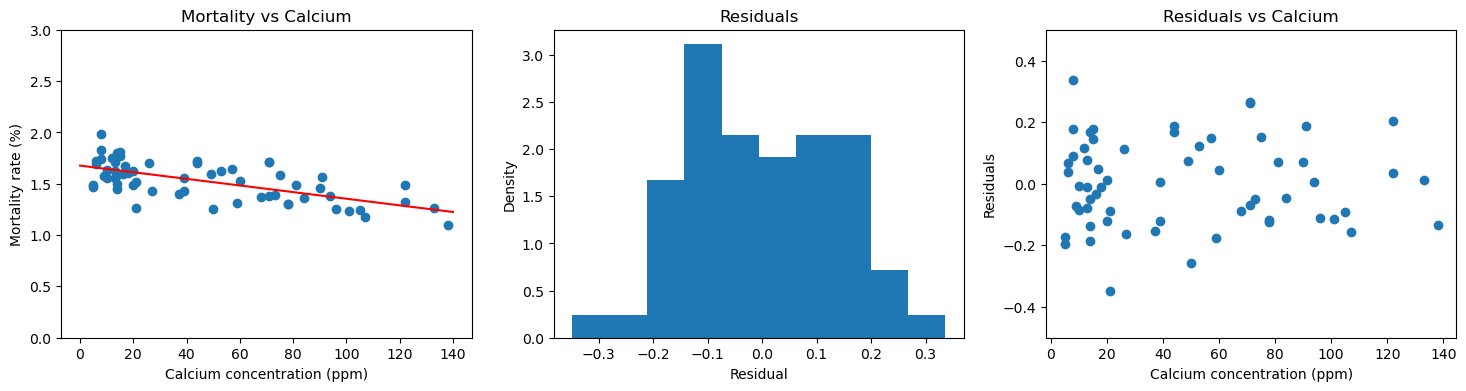

In [5]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,4))

# plot 1
ax[0].scatter(df["Calc"], df["Rate"])
ax[0].set_ylim([0,3])
ax[0].set_title("Mortality vs Calcium")
ax[0].set_xlabel("Calcium concentration (ppm)")
ax[0].set_ylabel("Mortality rate (%)")

x = np.linspace(0, 140)
y = b0 + b1*x
ax[0].plot(x, y, color="red")

# plot 2
residuals = lm.resid
ax[1].hist(residuals, density=True)
ax[1].set_title("Residuals")
ax[1].set_xlabel("Residual")
ax[1].set_ylabel("Density")

# plot 3
ax[2].scatter(df["Calc"], residuals)
ax[2].set_ylim([-.5,.5])
ax[2].set_title("Residuals vs Calcium")
ax[2].set_xlabel("Calcium concentration (ppm)")
ax[2].set_ylabel("Residuals");

- The data is linear (plot 1).
- The residuals follow a normal distribution (plot 2).
- The residuals are independent from each other, because there are no streaks of +/- residuals (plot 3).
- The residuals have homoscedasticity, because the errors are similar everywhere (plot 3).

### Coefficient of Determination

In [6]:
lm.rsquared

0.42882671931249716

> About $43\%$ of the variance in mortality rates can be explained by the calcium in the drinking water, which is a moderately sized value.

### Hypothesis Testing


#### Test to determine whether calcium has an effect on mortality:
Significance of $\alpha=0.01$.

> $H_0$: calcium concentration has no effect on mortality

> $H_a$: calcium concentration does have an effect on mortality

> From the summary table, the p-value of Calc is smaller than $0.01$  so the null hypothesis is rejected at this significance level.

#### Test to determine whether the effect on mortality is large enough for action

Does one part-per-million of `Calcium` decrease mortality rate by more than 0.0025 percentage?

Significance of $\alpha = 0.01$.

In [7]:
s0,s1 = lm.bse
print("Slope -/+ standard error:", (b1-s1, b1+s1))

Slope -/+ standard error: (-0.003710814700858523, -0.0027413685116297855)


> $H_0$: one part-per-million of calcium does not decrease mortality by more than $0.0025\%$

> $H_a$: one part-per-million of calcium does decrease mortality by more than $0.0025\%$

> Accounting for the standard error, the slopes($-0.0037$ and $-0.0027$) are still stronger than $0.0025$, so the null hypothesis can be rejected.

### Prediction and Confidence

#### Given a town whose drinking water has calcium concentration is say, 100 ppm, the 95% **prediction** band and 95% **confidence** band are:

In other words, given our linear model, what is the interval that we think should contain the actual mortality rate for Manchester?
In other words, what is the interval that we think should contain the **mean** mortality rate for any town with a Calcium concentration of 100 ppm?

In [8]:
pred100 = lm.get_prediction([1,100]) #100ppm calcium with column for intercept
predmat100 = pred100.summary_frame(alpha=0.05)

predband = (predmat100["obs_ci_lower"][0], predmat100["obs_ci_upper"][0])
ciband = (predmat100["mean_ci_lower"][0], predmat100["mean_ci_upper"][0])

print("Prediction Band:", predband)
print("Confidence Band:", ciband)

Prediction Band: (1.0606958581767005, 1.6467970219767853)
Confidence Band: (1.2907587114015246, 1.4167341687519612)


> Thus, given our linear model, the actual mortality rate of a town with 100ppm, is likely to be between $1.061$ and $1.647$, and **mean** mortality rate of any town with 100ppm is likely to be between $1.291$ and $1.416$.